
# Clusterização de Pokemóns
# Integrantes:
Alessandra Blücher; 
Bruno Arthur Cesconetto; 
Dennis Zaramelo Felex -
2°C


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
pokemons = pd.read_json('pokedex.json')
itens = pd.read_json('items.json')
habilidades = pd.read_json('skills.json')
tipos = pd.read_json('types.json')

In [3]:
pokemons.head()

,base,cname,ename,flatName,id,jname,model,skills,type
0,"{'Attack': 49, 'Defense': 49, 'HP': 45, 'Sp.At...",妙蛙种子,Bulbasaur,NaN,1,フシギダネ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
1,"{'Attack': 62, 'Defense': 63, 'HP': 60, 'Sp.At...",妙蛙草,Ivysaur,NaN,2,フシギソウ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
2,"{'Attack': 82, 'Defense': 83, 'HP': 80, 'Sp.At...",妙蛙花,Venusaur,NaN,3,フシギバナ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
3,"{'Attack': 52, 'Defense': 43, 'HP': 39, 'Sp.At...",小火龙,Charmander,NaN,4,ヒトカゲ,NaN,"{'egg': [314, 246, 251, 187, 44, 68, 242, 349,...",[炎]
4,"{'Attack': 64, 'Defense': 58, 'HP': 58, 'Sp.At...",火恐龙,Charmeleon,NaN,5,リザード,NaN,"{'egg': [314, 246, 251, 187, 44, 68, 242, 349,...",[炎]


In [4]:
#vamos abrir o dicionário contido em pokemons.base e adicionar novas colunas, uma para cada atributo: 

#criando listas as quais pegarão os valores de um mesmo atributo
Attack= []
Defense = []
HP = []
SpAtk = []
SpDef = []
Speed = []

#percorrendo o dicionário e adicionando os valores às listas
for idx, row in pokemons['base'].iteritems(): #para cada index i, em cada linha dessa coluna base...
    l=row.keys()   #l é uma variável que contempla as chaves do dicionário

    if 'Attack' in l:   #quando a variável assume a chave ataque
        Attack.append(row['Attack']) #adicionamos seu valor a lista externa "ataque"
    else:
        Attack.append(None) #caso não haja, pass
    if 'Defense' in l:
        Defense.append(row['Defense'])
    else:
        Defense.append(None)
    if 'HP' in l:
        HP.append(row['HP'])
    else:
        HP.append(None)
    if 'Sp.Atk' in l:
        SpAtk.append(row['Sp.Atk'])
    else:
        SpAtk.append(None)
    if 'Sp.Def' in l:
        SpDef.append(row['Sp.Def'])
    else:
        SpDef.append(None) 
    if 'Speed' in l:
        Speed.append(row['Speed'])
    else:
        Speed.append(None)
    
#criando as novas colunas com os valores separados
pokemons['Attack']=Attack
pokemons['Defense']=Defense
pokemons['HP']=HP
pokemons['Sp.Atk']=SpAtk
pokemons['Sp.Def']=SpDef
pokemons['Speed']=Speed

In [5]:
#filtrando o dataframe
df = pokemons[['ename','type','Attack','Defense','HP','Sp.Atk','Sp.Def','Speed']]
#renomenando as colunas
df.columns = ['nome','tipo','ataque','defesa','HP','spe.atk','spe.def','velocidade']
df.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60
2,Venusaur,"[草, 毒]",82,83,80,100,100,80
3,Charmander,[炎],52,43,39,60,50,65
4,Charmeleon,[炎],64,58,58,80,65,80


Explicação e Exemplos de aplicação de clusters

Aqui, temos uma referência teórica para diferentes métodos de clusterzação
http://scikit-learn.org/stable/modules/clustering.html

Exemplos de clusterização por K-means http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# Verificando o número ideal de clusters

In [6]:
#guarando os dados em variáveis
v1 = df['ataque']
v2 = df['defesa']
v3 = df['HP']
v4 = df['spe.atk']
v5 = df['spe.def']
v6 = df['velocidade']

#as variáveis serão componentes de uma matriz
X=np.array(list(zip(v1,v2,v3))).reshape(len(v1),3)

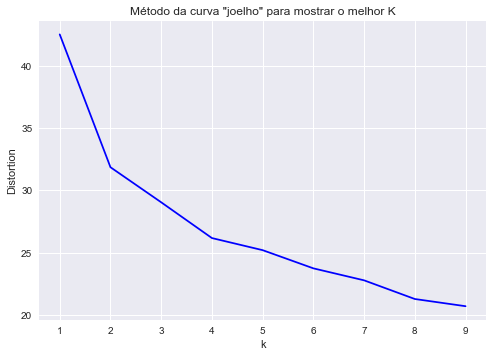

In [7]:
# kmeans determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# lot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método da curva "joelho" para mostrar o melhor K')
plt.show()
 

# Clusterizando o Dataframe

In [8]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
df.loc[:,'cluster'] = kmeans.labels_
df.head()

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45,1
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60,1
2,Venusaur,"[草, 毒]",82,83,80,100,100,80,3
3,Charmander,[炎],52,43,39,60,50,65,1
4,Charmeleon,[炎],64,58,58,80,65,80,1


# Plotando o resultado do fit realizado pelo Kmeans 

In [16]:
def showcluster(info,k,color):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if k!=len(color):
        print ("numero de cores diferente de clusters", len(color),k)
        return 0
    for i in range(0,k):
        ax.scatter(info[0][df.cluster==i], info[1][df.cluster==i], info[2][df.cluster==i], marker='o', c=color[i])
    return fig

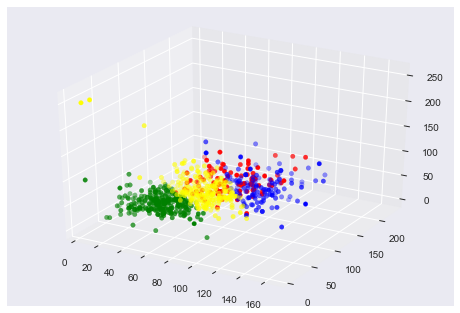

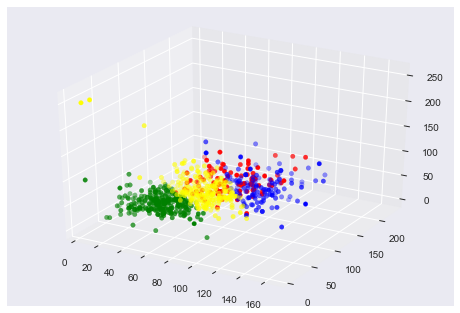

In [19]:
from mpl_toolkits.mplot3d import Axes3D
showcluster([df.ataque,df.defesa,df.HP],4,[['red'],['green'],['blue'],['yellow']])


# Separando o dataframe por clusters

In [11]:
cluster1 = df[df.cluster==0]
cluster1.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
8,Blastoise,[水],83,100,79,85,105,78,0
27,Sandslash,[地上],100,110,75,45,55,65,0
73,Geodude,"[岩石, 地上]",80,100,40,30,30,20,0
74,Graveler,"[岩石, 地上]",95,115,55,45,45,35,0
75,Golem,"[岩石, 地上]",120,130,80,55,65,45,0


In [12]:
cluster2 = df[df.cluster==1]
cluster2.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45,1
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60,1
3,Charmander,[炎],52,43,39,60,50,65,1
4,Charmeleon,[炎],64,58,58,80,65,80,1
6,Squirtle,[水],48,65,44,50,64,43,1


In [13]:
cluster3 = df[df.cluster==2]
cluster3.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
30,Nidoqueen,"[毒, 地上]",92,87,90,75,85,76,2
33,Nidoking,"[毒, 地上]",102,77,81,85,75,85,2
58,Arcanine,[炎],110,80,90,100,80,95,2
61,Poliwrath,"[水, 格斗]",95,95,90,70,90,70,2
67,Machamp,[格斗],130,80,90,65,85,55,2


In [14]:
cluster4 = df[df.cluster==3]
cluster4.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
2,Venusaur,"[草, 毒]",82,83,80,100,100,80,3
5,Charizard,"[炎, 飞行]",84,78,78,109,85,100,3
7,Wartortle,[水],63,80,59,65,80,58,3
14,Beedrill,"[虫, 毒]",90,40,65,45,80,75,3
17,Pidgeot,"[一般, 飞行]",80,75,83,70,70,101,3
